# Overview of Seaborn, Matplotlib and Plotly libraries

In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

In [2]:
df = pd.read_csv('./data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [3]:
# Cheching data types and presence of N/A

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [4]:
# Converting numerical data into the int or float types

df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [6]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]  # choosing the columns with list creation

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
6,11.28,9.14,6.50,2.88,29.80,2006
7,13.96,9.18,2.93,2.84,28.92,2006
...,...,...,...,...,...,...
16667,0.01,0.00,0.00,0.00,0.01,2001
16677,0.01,0.00,0.00,0.00,0.01,2002
16696,0.00,0.01,0.00,0.00,0.01,2014
16700,0.01,0.00,0.00,0.00,0.01,2011


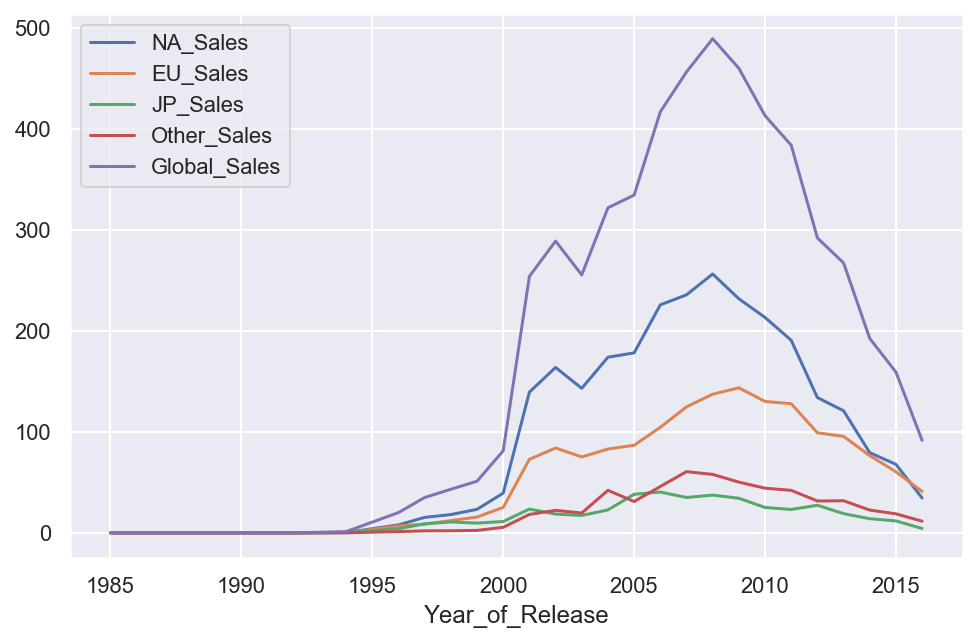

In [7]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

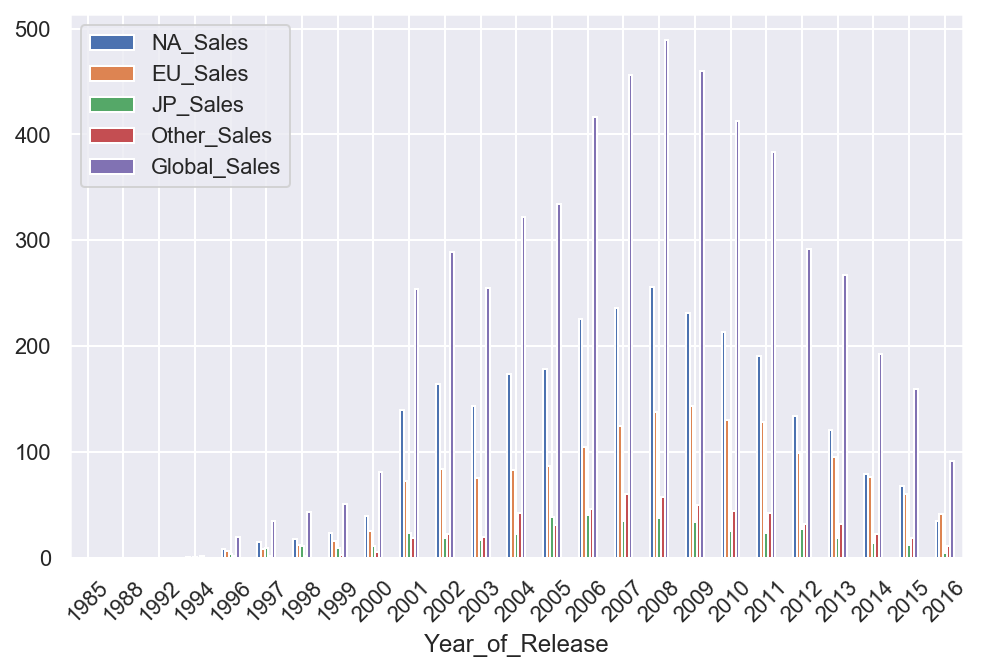

In [8]:
# Important plot's argument - kind

df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

# Seaborn

### pairplot()

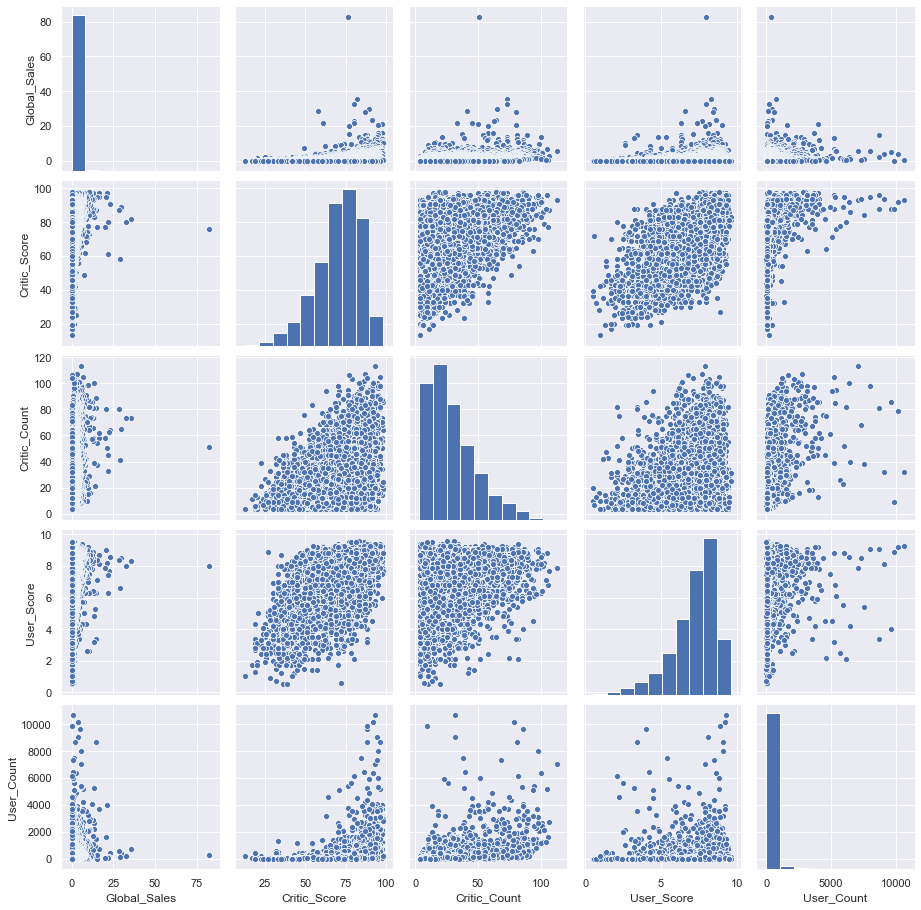

In [9]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

In [10]:
# the distribution histograms lie on the diagonal of the matrix.
# The remaining charts are scatter plots for the corresponding pairs of features

### distplot()

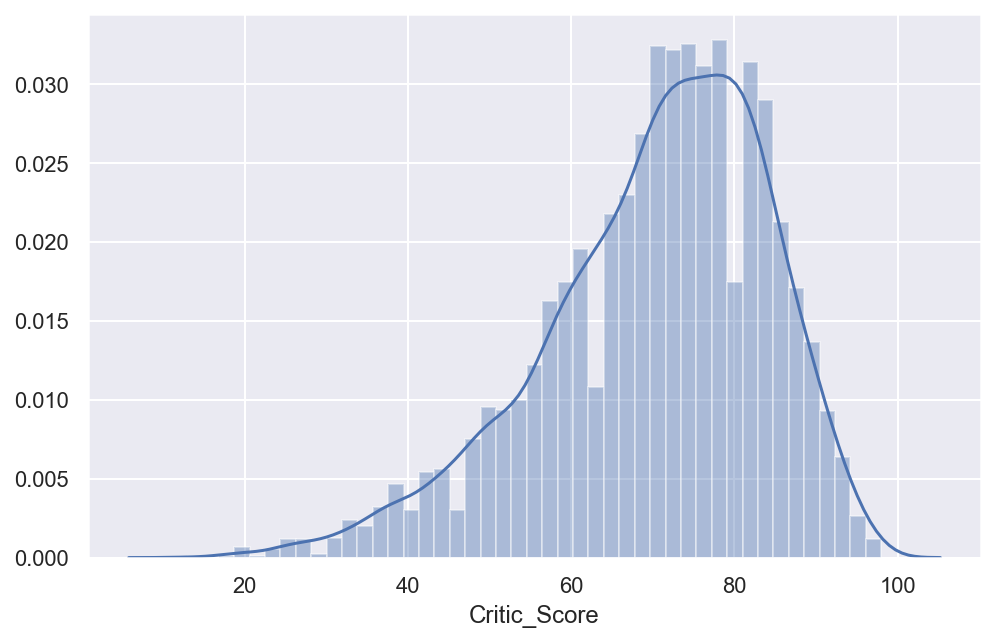

In [11]:
# plots destribution of the variable

%config InlineBackend.figure_format = 'retina'
sns.distplot(df['Critic_Score']);

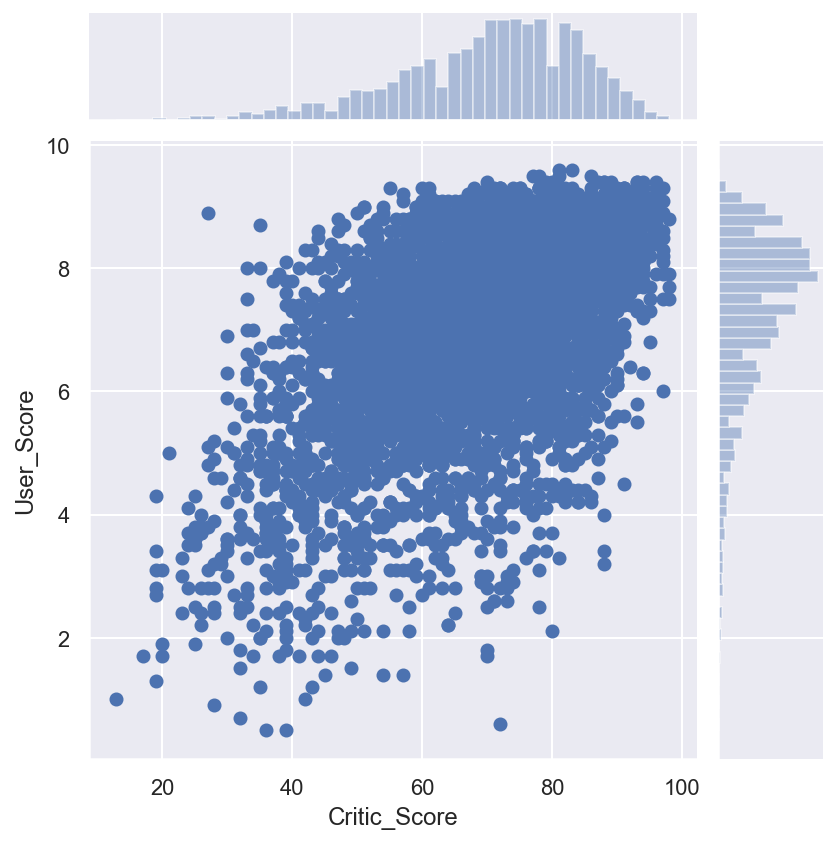

In [12]:
# for simultaneous scatter and hist plotting
# joinplot() is used

sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

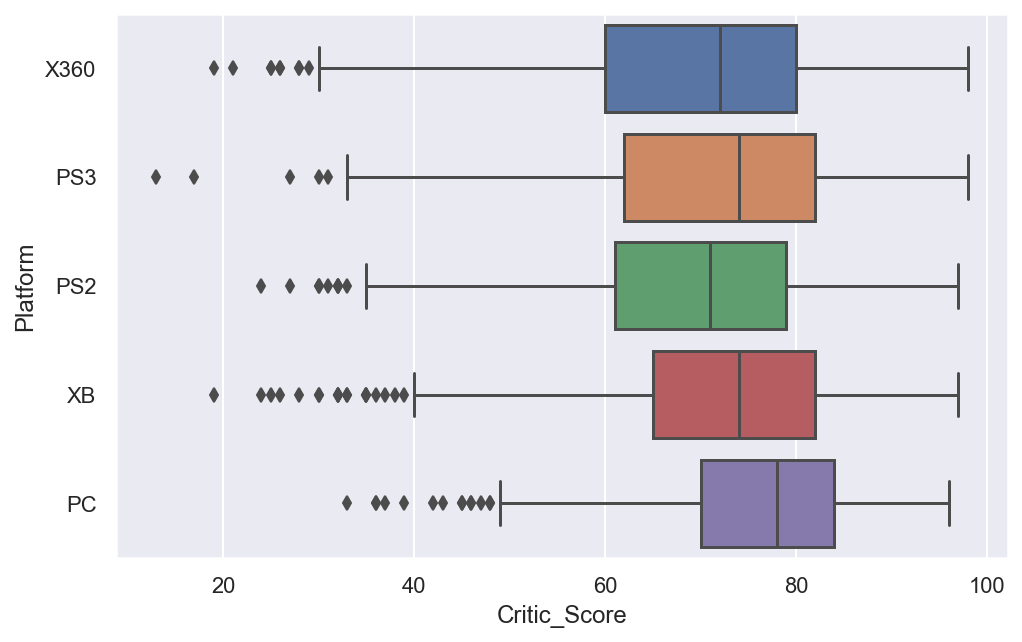

In [13]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)], orient="h");

### heatmap()

In [14]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

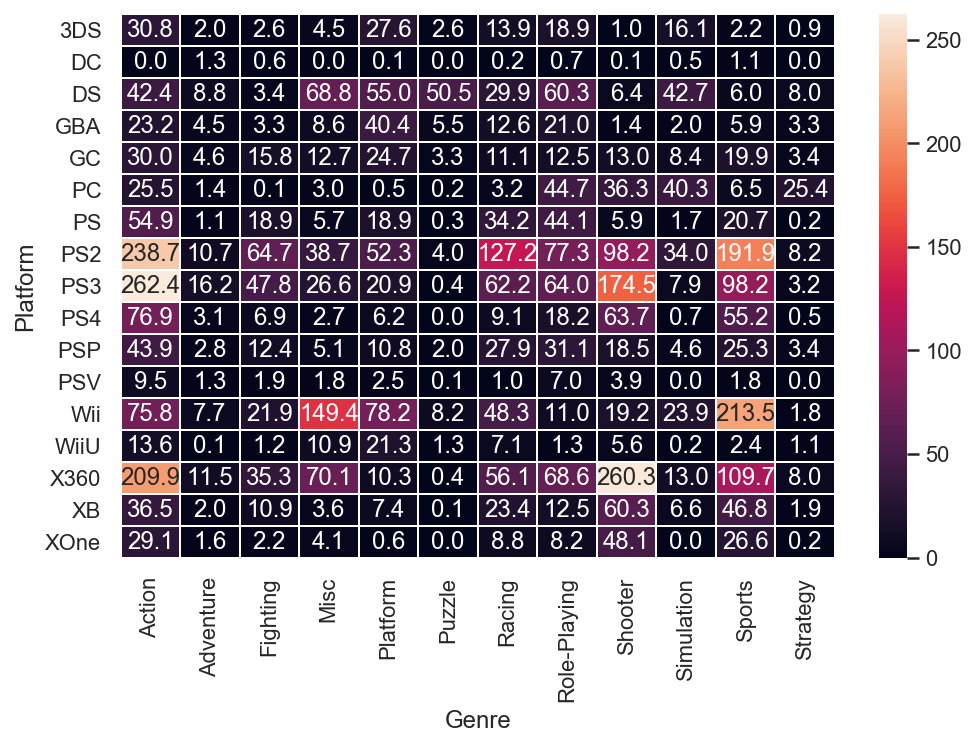

In [15]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

# Plotly - allows to create interactive charts

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [17]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df

,Global_Sales,Name
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [18]:
years_df.columns = ['Global_Sales', 'Number_of_Games']

Figure is the main class and a work horse of visualization in plotly. It consists of the data (an array of lines called traces in this library) and the style (represented by the layout object). In the simplest case, you may call the iplot function to return only traces.



The show_link parameter toggles the visibility of the links leading to the online platform plot.ly in your charts. Most of the time, this functionality is not needed, so you may want to turn it off by passing show_link=False to prevent accidental clicks on those links.

In [19]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [20]:
# saving your plotly in html
# plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

### Bar charts

In [21]:
# Do calculations and prepare the dataset
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [22]:
platforms_df

,Global_Sales,Number_of_Games
Platform,,
PS2,945.97,1140
X360,853.30,858
PS3,784.30,769
Wii,658.98,479
DS,382.33,464
PS4,243.03,239
XB,212.07,565
PS,206.55,150
PSP,187.92,390


In [23]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

### Box plots

In [24]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(data, show_link=False)